## Name: Thushal Babukumar ||  ID  : 46154469 || Portfolio-2

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Reading our Test and Train data

In [17]:
test = pd.read_csv('data/testing.csv', parse_dates=True)
train = pd.read_csv('data/training.csv',  parse_dates=True)


In [151]:
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,Monthstr
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday,Jan
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday,Jan
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday,Jan
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday,Jan
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday,Jan


In [152]:
train.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week', 'Monthstr'],
      dtype='object')

In [19]:
print('Testing data shape ', test.shape)
print('Training data shape ', train.shape)

Testing data shape  (4932, 32)
Training data shape  (14803, 32)


## Creating a new column to convert the datatime format to a month

In [22]:
train['date'] = pd.to_datetime(train['date'])
train['Monthstr'] = train['date'].dt.strftime('%b')
train['Monthstr'].head().to_frame()

,Monthstr
0,Jan
1,Jan
2,Jan
3,Jan
4,Jan


In [24]:
print('The actual months of data present in our DataFrame: ',set(train['Monthstr']))

The actual months of data present in our DataFrame:  {'Apr', 'Feb', 'May', 'Jan', 'Mar'}


## Appliance Energy consumption measurement for the whole period
### *Comment: We see that Energy usage of appliances is highest in February and April*

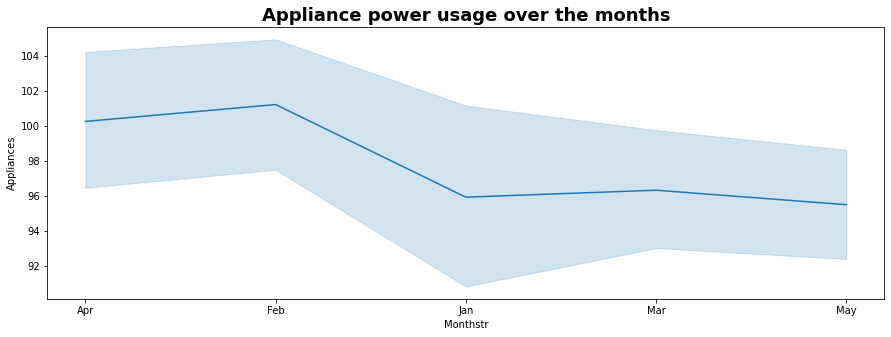

In [25]:
plt.figure(figsize=(15,5))

plt.ylabel('y')
plt.title('Appliance power usage over the months', fontsize=18,fontweight='bold')


sns.lineplot(train.Monthstr, train.Appliances, data=train)

## A closer look at the first week of data
### *Comment: We see that energy usage goes up as the weekend nears*

Text(0.5, 1.0, 'Appliance power usage in the 1st week of January')

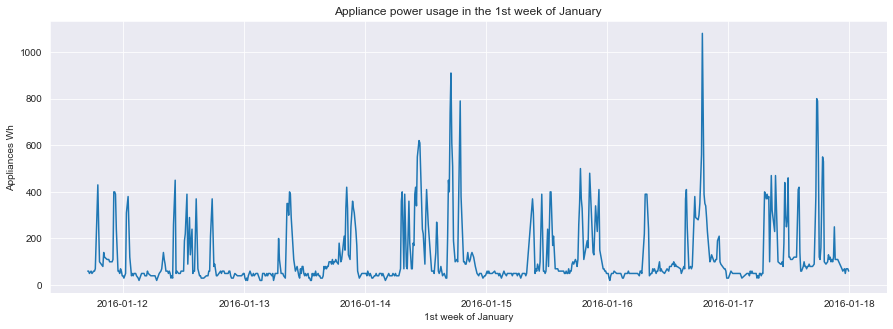

In [205]:

plt.figure(figsize=(15,5))
plt.plot('Date','Appliances', data=weeks[0])#weeks list is defined later on
plt.xlabel('1st week of January')
plt.ylabel('Appliances Wh')
plt.title('Appliance power usage in the 1st week of January')


## Distribution of Appliance power usage in our training data set

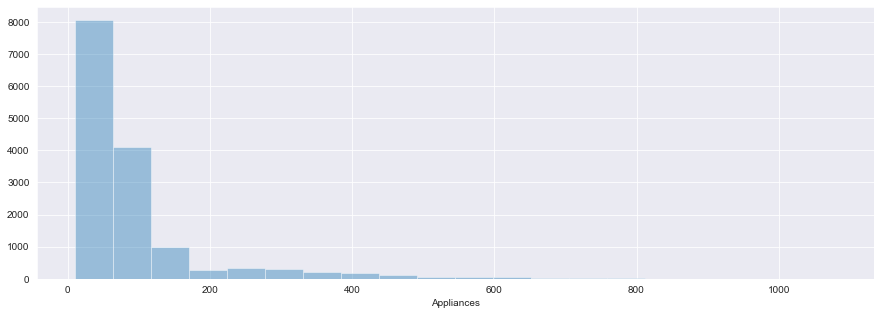

In [36]:
plt.figure(figsize=(15,5))
sns.set_style("darkgrid")
sns.distplot(train['Appliances'],bins=20, kde=False)





## A box plot distribution of power usage of appliances

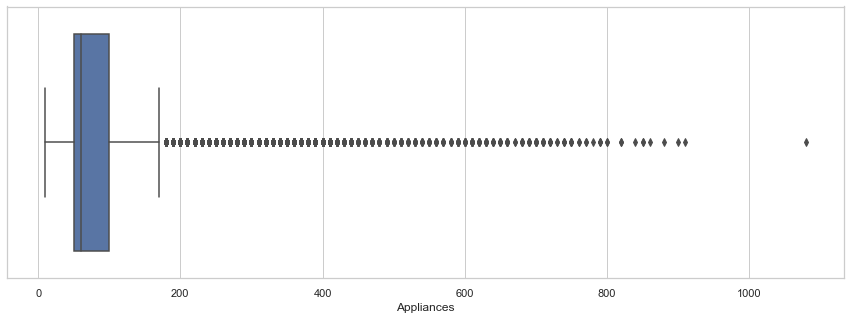

In [9]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,5))
sns.boxplot(x='Appliances',  data=train, orient='h')

## Plotting Heatmap for energy consumption of Appliance for all weeks in the month of January

### *Comment:* 

### *- We can see that the first week of January the energy uasge is high, while has the rest of the weeks of the month, the energy usage is fairly constant. This can be attributed to the new year holidays which would extend into the first week of January*

### *- We can also see that the energy usage is higher during the weekends as expected*

In [159]:
#creating a DF for the month of January
janDf = pd.DataFrame(train[train['Monthstr'] == 'Jan']['Appliances'])
janDf['Date'] = train[train['Monthstr'] == 'Jan']['date']
janDf['Day'] = train[train['Monthstr'] == 'Jan']['Day_of_week']


In [154]:
#Creating a list extracting time from the date column
from datetime import datetime
listTime = []
for i in janDF['Date']:
    x = pd.to_datetime(i)
    now = datetime.time(i)
    listTime.append(now.strftime("%H"))
    
#https://stackoverflow.com/questions/16138744/extract-time-from-datetime-and-determine-if-time-not-date-falls-within-range

In [160]:
#creating a Time column for our jan DF
janDF['Time'] = listTime

In [161]:
#Creating a series where each index contains DF of each week
from pandas import Timestamp
weeks = [g for n, g in janDF.groupby(pd.Grouper(key = 'Date', freq = 'W'))]

#https://stackoverflow.com/questions/57619777/timegrouper-part-of-pandas?noredirect=1&lq=1

In [162]:
# pandas pivot to create a heatmap , hours vs Days with Appliance as value
heatmap1_data = pd.pivot_table(weeks[0], values='Appliances', 
                     index=['Time'], 
                     columns='Day')

heatmap2_data = pd.pivot_table(weeks[1], values='Appliances', 
                     index=['Time'], 
                     columns='Day')

heatmap3_data = pd.pivot_table(weeks[2], values='Appliances', 
                     index=['Time'], 
                     columns='Day')


Text(0.5, 0.98, 'Heatmap of Energy Consumption for every week in January')

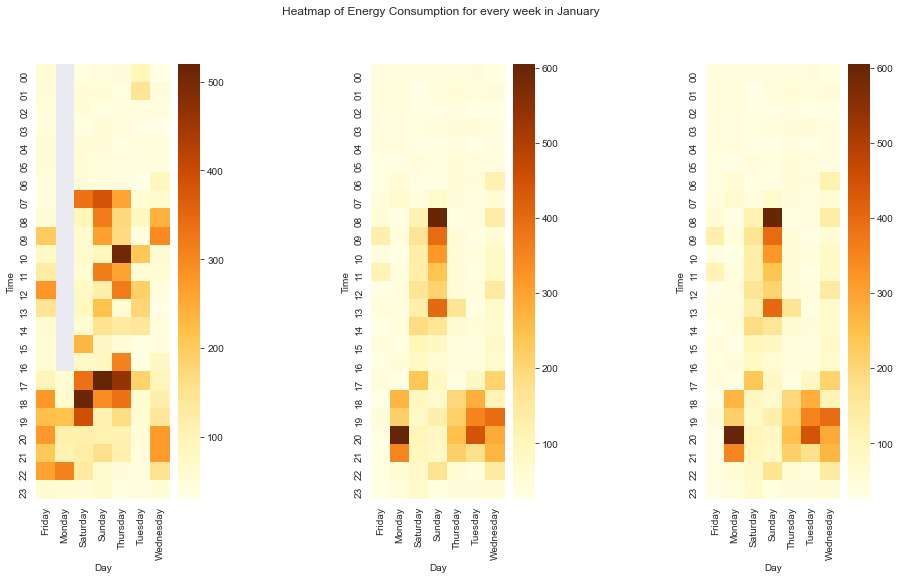

In [176]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
plt.subplots_adjust(wspace = 1)

sns.heatmap(heatmap1_data, cmap="YlOrBr", ax=ax0)
sns.heatmap(heatmap2_data, cmap="YlOrBr", ax=ax1)
sns.heatmap(heatmap2_data, cmap="YlOrBr", ax=ax2)
fig.suptitle('Heatmap of Energy Consumption for every week in January')

#https://matplotlib.org/3.3.2/gallery/lines_bars_and_markers/errorbar_subsample.html#sphx-glr-gallery-lines-bars-
#and-markers-errorbar-subsample-py

## Correlation Graph

### *Comment: Correlation graph shows that there is a positive correlation between the energy consumption of appliances and lights (0.19). The second largest correlation is between appliances and T2. For the indoor temperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air temperature differences between rooms. For example, a positive correlation is found with T1 and T3.*

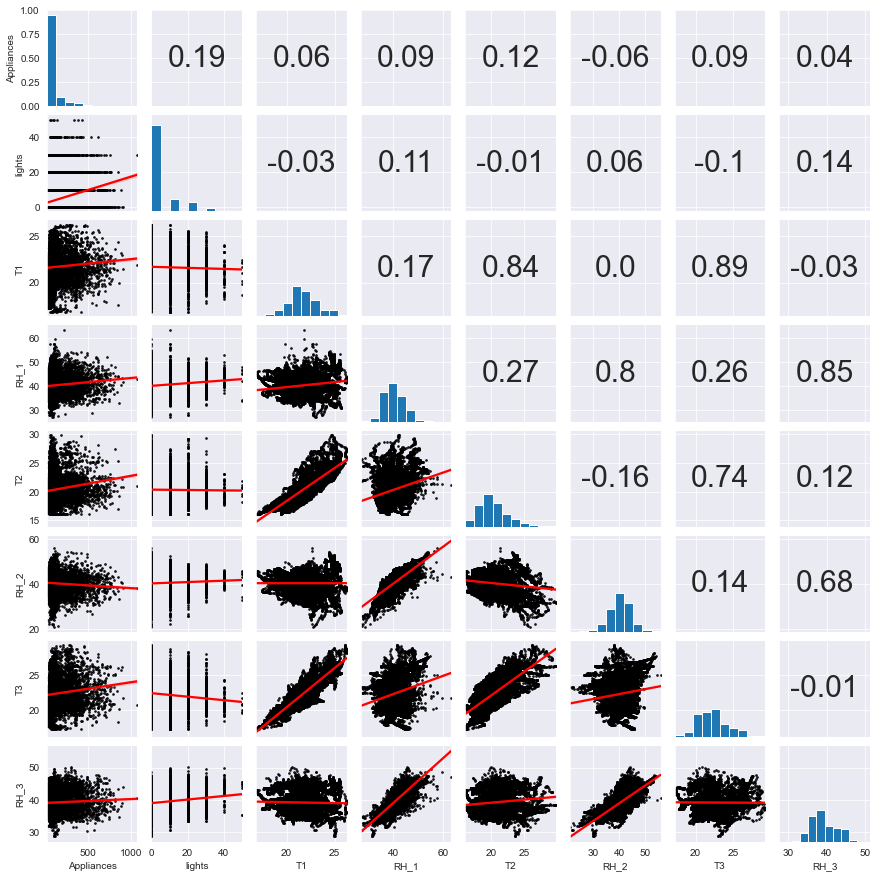

In [178]:
# Using correlation coeffs
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 30)
    
scatterdata = train[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

# Model Building - Logistic Regression
## Calculating MSE, R2 and RMSE to check accuracy of our model with only numerical values

In [179]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Source: https://stackoverflow.com/questions/47648133/mape-calculation-in-python


In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Xtrain = train.drop(['date','WeekStatus','Day_of_week','Monthstr', 'Appliances'], axis=1)
y = train['Appliances']
model = LinearRegression()
model.fit(Xtrain,y)
predicted = model.predict(Xtrain)
print('Testing scores:')
print('MAE:', mean_absolute_error(y, predicted))
print('R2 square:', r2_score(y, predicted))
print('RMSE:', np.sqrt(mean_squared_error(y, predicted)))
print('MAPE',mean_absolute_percentage_error(y, predicted))

Testing scores:
MAE: 53.255031292957206
R2 square: 0.17188056846730493
RMSE: 93.57143468503801
MAPE 61.49412441844212


## Converting categorical values to numerical values to include categorical values in our LR model

In [181]:
set(train['WeekStatus'])

{'Weekday', 'Weekend'}

In [182]:
train_status = pd.get_dummies(train['WeekStatus'])

train_status.head()

,Weekday,Weekend
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [183]:
train_day = pd.get_dummies(train['Day_of_week'])
train_day.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [184]:
train = train.join(train_status)

In [185]:
train = train.join(train_day)

## RMSE, MAE, R2 score after converting and adding categorical values

### *Comment: We can see that there is a slight improvement of our model scores after including categorical values in our feature set*

In [190]:
Xtrain = train.drop(['date','WeekStatus','Day_of_week','Monthstr', 'Appliances'], axis=1)
y = train['Appliances']
model = LinearRegression()
model.fit(Xtrain,y)
predicted = model.predict(Xtrain)
print('Testing scores after adding categorical values:')
print('MAE:', mean_absolute_error(y, predicted))
print('R2 square:', r2_score(y, predicted))
print('RMSE:', np.sqrt(mean_squared_error(y, predicted)))
print('MAPE',mean_absolute_percentage_error(y, predicted))


Testing scores after adding categorical values:
MAE: 53.138912335056055
R2 square: 0.17834376492372528
RMSE: 93.20557248110671
MAPE 61.33117488093237


## Feature importance using RFE
### *Comment: We are plotting a graph checking how will our R2 score vary depending on how many features we have selected. We see that acceptable R2 score is when all features are selected for our data set*

In [206]:
feature_columns = Xtrain.columns 

Xrfe = train[feature_columns]
yrfe = train['Appliances']



In [207]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, 37) # select 36 features for us
selector = selector.fit(Xrfe, yrfe)
supp = selector.get_support()
print("Selected features:", feature_columns[supp])

# test the model
predicted = selector.predict(Xrfe)
print("RMSE:", np.sqrt(mean_squared_error(yrfe, predicted)))
print("R^2:", r2_score(yrfe, predicted))

Selected features: Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'NSM', 'Weekday', 'Weekend', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')
RMSE: 93.20557248110671
R^2: 0.17834376492372528


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=37 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [208]:
rmse_scores = []
for i in range(1,38):
    selector = RFE(estimator,i)
    selector.fit(Xrfe,yrfe)
    predicted = selector.predict(Xrfe)
    rmse_score = np.sqrt(mean_squared_error(yrfe, predicted))
    rmse_scores.append(rmse_score)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=31 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=32 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=33 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=34 as keyword args. From version 0.25 passing thes

37


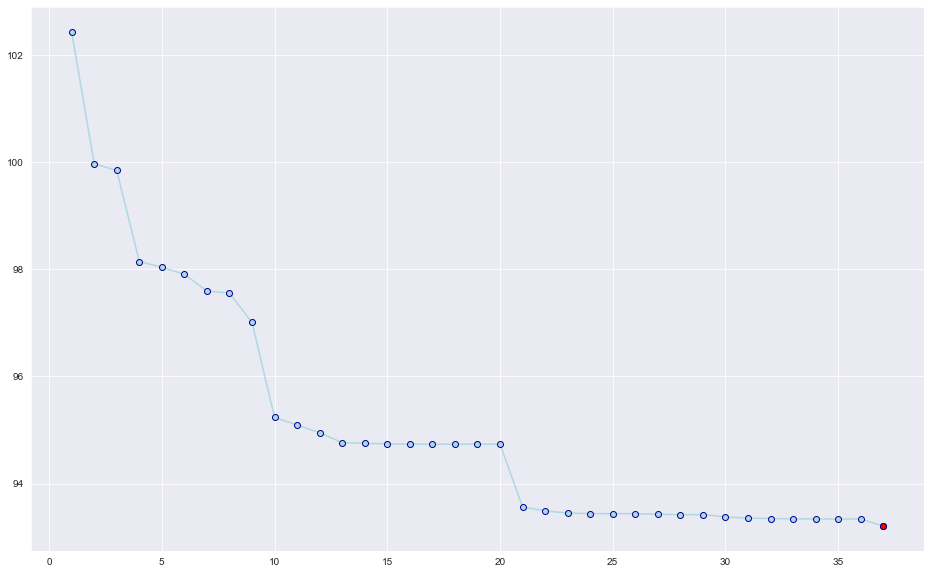

In [195]:
best = 1
for item in rmse_scores:
    if item < rmse_scores[best -1]:
        best = rmse_scores.index(item) + 1
print(best)

plt.figure(figsize=(16,10))
plt.plot(range(1,38), rmse_scores,marker='o', color='lightblue',markeredgewidth=1, markeredgecolor='DarkBlue')
plt.plot(best, rmse_scores[best -1],marker='o', color='red',markeredgewidth=1, markeredgecolor='DarkBlue')

## Conclusion: 

### While exploring our dataset we saw the energy consumption during holidays and the weekends are higher
### Based on the correlation graph, we see that the temprature in inner rooms T1, T2 is much lower than the temprature in Laundry room T3. This is expected because the inner rooms will be cooled down by an aircooler unit.
### Finally, we can see that for our model to be more accurate we have to select the maximum features available at our disposal, .i.e. both categorical and numerical features